In [1]:
import pandas as pd, numpy as np
from datetime import datetime
import statsmodels.api as sm
import yfinance as yf
import time, urllib
import glob
import os

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=False, rc=None)

# 导入自己的模块
from data_download_US_HK import *
from strategies import *
from positions import *

# 模块一：下载数据到csv文件

In [4]:
us_tickers = list(set(US_TICKERS_POOL.us_tech_stocks() + \
			              US_TICKERS_POOL.us_blockchain_stocks() + \
			              US_TICKERS_POOL.us_saas_stocks() + \
			              US_TICKERS_POOL.us_biotech_stocks() + \
			              US_TICKERS_POOL.us_new_energy_stocks() + \
			              US_TICKERS_POOL.global_etfs() + \
			              US_TICKERS_POOL.sector_etf() + \
			              US_TICKERS_POOL.global_indices() +\
			              US_TICKERS_POOL.us_healthcare_stocks() +\
			              US_TICKERS_POOL.us_fin_stocks() +\
			              US_TICKERS_POOL.us_utilities_stocks() +\
			              US_TICKERS_POOL.us_materials_stocks() +\
			              US_TICKERS_POOL.other_us_stocks() +\
                            US_TICKERS_POOL.us_consumer_discretionary_stocks() +\
                            US_TICKERS_POOL.us_consumer_staples_stocks() +\
                            US_TICKERS_POOL.us_industrial_stocks() +\
                            US_TICKERS_POOL.us_real_estate_stocks() +\
                            US_TICKERS_POOL.us_tele_entertainment_stocks()
                          ))

# global_etfs_leveraged = list(set(["TQQQ",#纳指100x3
# 					"UPRO",#标普x3                        
# 					"UDOW",#道指x3
                        

# 					"USD", # 半导体行业x2
# 					"SOXL", # 半导体行业x3
# 					"UYG",# 金融双倍做多
# 					"URE",# 房地产双倍做多
# 					"DRN",#x3
# 					"DIG",# 能源双倍做多
# 					"ERX",#x3
# 					"UYM",# 原材料双倍做多 
# 					"MATL",#x3
# 					"NUGT",#黄金矿业三倍做多
# 					"EET",# 新兴市场指数双倍做多
# 					"EDC",#x3
# 					"XPP",# 中国股票指数x2
# 					"UCO",# 石油x2
# 					"DGP",# 黄金x2
# 					"UGL",# 黄金x2
# 					"AGQ",# 白银x2
# 					"EUO",# 美元x2
# 					"UBT",# 政府长期债券x2
# 					"TMF"# x3
# 					]))
futures_tickers = FUTURES.futures()
hk_tickers = HK_TICERS_POOL.HK_tickers()
CN_mutual_funds_tickers = CN_TICKERS_POOL.CN_fund_tickers()

tickers_to_load = list(set(us_tickers+futures_tickers+hk_tickers))
print("Length of all tickers here:", len(tickers_to_load))

start = "2005-01-01"
today = LOAD_DATA.today_dt()
end = today

# 如果用这个yesterday，则代表着只需要到昨天的数据
# end_yesterday = "2021-03-02"

us_db_path = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/"

Length of all tickers here: 360


In [5]:
# download data to csv files
# LOAD_DATA.easy_download(start, end, us_db_path, all_tickers_to_load[53:242])
LOAD_DATA.easy_download(start, end, us_db_path,tickers_to_load)
# LOAD_DATA.easy_download(start, end, us_db_path, ["^HSI"])

[*********************100%***********************]  1 of 1 completed
No.1: 0151.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.2: 6055.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.3: CAN data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.4: EWW data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.5: ARKQ data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.6: 0493.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.7: 0777.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.8: C data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.9: VXX data file created: 2021-04-06
[***

[*********************100%***********************]  1 of 1 completed
No.74: WORK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.75: SHW data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.76: PM data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.77: 0418.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.78: BAC data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.79: QQQ data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.80: 6993.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.81: ECL data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.82: 1475.HK data file created: 2021-04-0

[*********************100%***********************]  1 of 1 completed
No.148: SBE data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.149: EBON data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.150: INTC data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.151: TEAM data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.152: MRK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.153: LAC data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.154: COST data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.155: XLE data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.156: BLNK data file created: 2021-04

[*********************100%***********************]  1 of 1 completed
No.222: EQIX data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.223: WES data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.224: XLRE data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.225: VEEV data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.226: PFE data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.227: 0981.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.228: MET data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.229: DUK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.230: 6618.HK data file created: 2

[*********************100%***********************]  1 of 1 completed
No.295: 2100.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.296: BABA data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.297: LTHM data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.298: SO data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.299: SQM data file created: 2021-04-06
=======================Sleeping======================
[*********************100%***********************]  1 of 1 completed
No.301: SAM data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.302: 2382.HK data file created: 2021-04-06
[*********************100%***********************]  1 of 1 completed
No.303: GILD data file created: 2021-04-06
[*********************100%**********************

In [7]:
# Download data from Sina:
LOAD_DATA.download_data_from_Sina(CN_mutual_funds_tickers, start, end, us_db_path)

All Data Downloaded


In [8]:
data_list_selected = LOAD_DATA.read_data_from_folders(us_tickers, us_db_path)

Loadig Data from DB: No.1 / 265: AEP
Loadig Data from DB: No.2 / 265: MMM
Loadig Data from DB: No.3 / 265: DOCU
Loadig Data from DB: No.4 / 265: FXI
Loadig Data from DB: No.5 / 265: LOW
Loadig Data from DB: No.6 / 265: VZ
Loadig Data from DB: No.7 / 265: MARA
Loadig Data from DB: No.8 / 265: DIS
Loadig Data from DB: No.9 / 265: FXF
Loadig Data from DB: No.10 / 265: JNJ
Loadig Data from DB: No.11 / 265: EWC
Loadig Data from DB: No.12 / 265: URE
Loadig Data from DB: No.13 / 265: UYM
Loadig Data from DB: No.14 / 265: JPM
Loadig Data from DB: No.15 / 265: CMCSA
Loadig Data from DB: No.16 / 265: GBTC
Loadig Data from DB: No.17 / 265: TME
Loadig Data from DB: No.18 / 265: CVS
Loadig Data from DB: No.19 / 265: CAN
Loadig Data from DB: No.20 / 265: EWW
Loadig Data from DB: No.21 / 265: PDD
Loadig Data from DB: No.22 / 265: ARKQ
Loadig Data from DB: No.23 / 265: GE
Loadig Data from DB: No.24 / 265: ES
Loadig Data from DB: No.25 / 265: ARKK
Loadig Data from DB: No.26 / 265: NOW
Loadig Data from 

Loadig Data from DB: No.212 / 265: WORK
Loadig Data from DB: No.213 / 265: UBT
Loadig Data from DB: No.214 / 265: MSFT
Loadig Data from DB: No.215 / 265: AAPL
Loadig Data from DB: No.216 / 265: DDOG
Loadig Data from DB: No.217 / 265: LAZR
Loadig Data from DB: No.218 / 265: XLF
Loadig Data from DB: No.219 / 265: AXP
Loadig Data from DB: No.220 / 265: SHW
Loadig Data from DB: No.221 / 265: PM
Loadig Data from DB: No.222 / 265: UGL
Loadig Data from DB: No.223 / 265: SPLK
Loadig Data from DB: No.224 / 265: BILI
Loadig Data from DB: No.225 / 265: WDAY
Loadig Data from DB: No.226 / 265: WFC
Loadig Data from DB: No.227 / 265: UCO
Loadig Data from DB: No.228 / 265: EWT
Loadig Data from DB: No.229 / 265: BAC
Loadig Data from DB: No.230 / 265: ADBE
Loadig Data from DB: No.231 / 265: QQQ
Loadig Data from DB: No.232 / 265: DRN
Loadig Data from DB: No.233 / 265: KHC
Loadig Data from DB: No.234 / 265: ECL
Loadig Data from DB: No.235 / 265: CAT
Loadig Data from DB: No.236 / 265: DBC
Loadig Data from 

In [9]:
# Generate signals
daily_macd_updown_signals = GENERATE_SIGNALS.generate_signals_macd_updown_ma_slope( 
                                                                           data_list_selected,
#                                                                            CN_fund_data,
                                                                          "Macd_Updown_MA_Slope_Signals", 
                                                                          "Date", 
                                                                          "Adj Close", 
                                                                          "Ticker", 
                                                                          "D")

Signals(D) Prepared for No.1 : AEP
Signals(D) Prepared for No.2 : MMM
Signals(D) Prepared for No.3 : DOCU
Signals(D) Prepared for No.4 : FXI
Signals(D) Prepared for No.5 : LOW
Signals(D) Prepared for No.6 : VZ
Signals(D) Prepared for No.7 : MARA
Signals(D) Prepared for No.8 : DIS
Signals(D) Prepared for No.9 : FXF
Signals(D) Prepared for No.10 : JNJ
Signals(D) Prepared for No.11 : EWC
Signals(D) Prepared for No.12 : URE
Signals(D) Prepared for No.13 : UYM
Signals(D) Prepared for No.14 : JPM
Signals(D) Prepared for No.15 : CMCSA
Signals(D) Prepared for No.16 : GBTC
Signals(D) Prepared for No.17 : TME
Signals(D) Prepared for No.18 : CVS
Signals(D) Prepared for No.19 : CAN
Signals(D) Prepared for No.20 : EWW
Signals(D) Prepared for No.21 : PDD
Signals(D) Prepared for No.22 : ARKQ
Signals(D) Prepared for No.23 : GE
Signals(D) Prepared for No.24 : ES
Signals(D) Prepared for No.25 : ARKK
Signals(D) Prepared for No.26 : NOW
Signals(D) Prepared for No.27 : SQ
Signals(D) Prepared for No.28 : PG

Signals(D) Prepared for No.225 : WDAY
Signals(D) Prepared for No.226 : WFC
Signals(D) Prepared for No.227 : UCO
Signals(D) Prepared for No.228 : EWT
Signals(D) Prepared for No.229 : BAC
Signals(D) Prepared for No.230 : ADBE
Signals(D) Prepared for No.231 : QQQ
Signals(D) Prepared for No.232 : DRN
Signals(D) Prepared for No.233 : KHC
Signals(D) Prepared for No.234 : ECL
Signals(D) Prepared for No.235 : CAT
Signals(D) Prepared for No.236 : DBC
Signals(D) Prepared for No.237 : RTX
Signals(D) Prepared for No.238 : CCI
Signals(D) Prepared for No.239 : ATVI
Signals(D) Prepared for No.240 : CRWD
Signals(D) Prepared for No.241 : RSX
Signals(D) Prepared for No.242 : INDA
Signals(D) Prepared for No.243 : ALB
Signals(D) Prepared for No.244 : ADSK
Signals(D) Prepared for No.245 : XLK
Signals(D) Prepared for No.246 : ABBV
Signals(D) Prepared for No.247 : CSCO
Signals(D) Prepared for No.248 : PYPL
Signals(D) Prepared for No.249 : NVDA
Signals(D) Prepared for No.250 : XLB
Signals(D) Prepared for No.2

In [10]:
daily_macd_updown_signals_to_present = daily_macd_updown_signals[daily_macd_updown_signals['Signal']=="买入"]
daily_macd_updown_signals_to_present["满足的趋势形态"] = "前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态"
daily_macd_updown_signals_to_present.columns = ['股票代号','最新收盘日','信号','模型名称','模型频率','满足的趋势形态']

<ipython-input-10-2094c7f15a0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_macd_updown_signals_to_present["满足的趋势形态"] = "前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态"


In [11]:
daily_macd_updown_signals_to_present[['股票代号','最新收盘日','满足的趋势形态']]

,股票代号,最新收盘日,满足的趋势形态
0,AEP,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
49,T,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
62,ADP,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
72,TGT,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
78,MCD,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
79,RACE,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
87,SCO,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
89,SO,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
91,LMT,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态
101,SAM,2021-04-05,前一日MACD值开始向上反转，并且价格收盘于5日均线之上，并且10日均线处于上升状态


In [12]:
daily_macd_updown_signals[daily_macd_updown_signals["Ticker"]=="TQQQ"]

,Ticker,Last_Date,Signal,model_name,model_freq
256,TQQQ,2021-04-05,多头持有,Macd_Updown_MA_Slope_Signals,D


In [13]:
signal_path = "C:/Users/Administrator/CE_github_2/data_pipeline/Signals/"

###################################
signal_file = signal_path+end+"_signals"+"_D_US_mkt"+".csv"
###################################

# merged_daily_weekly.to_csv(signal_file)
daily_macd_updown_signals.to_csv(signal_file)

In [14]:
signal = pd.read_csv(signal_file)
perf = pd.read_csv("C:/Users/Administrator/CE_github_2/data_pipeline/Performance/US_performance_MACD_UPDOWN_MA_SLOPE_W_COMM_all.csv")
# support and resistance:
# sar_signal = pd.read_csv("C:/Users/Administrator/CE_github_2/data_pipeline/Signals/2021-03-24_SAR_signals_D_US_mkt.csv")

In [15]:
merged = perf.merge(signal, on = "Ticker")
# merged.dropna(inplace = True)
# merged = merged.merge(sar_signal, on = "Ticker")

In [16]:
merged_buy = merged[merged['Signal']=='买入']

In [17]:
merged_buy

,Ticker,total_commission,gross_profit,net_profit,commission_impact,win %,PL Ratio,overall_score,strat_name,commission,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 0,Last_Date,Signal,model_name,model_freq
50,QCOM,264,4208.12,3944.12,6.27%,48.48,1.83,0.37,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,105,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
58,EBAY,236,2331.38,2095.38,10.12%,38.98,2.37,0.32,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,142,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
59,XLV,252,1650.71,1398.71,15.27%,52.38,1.52,0.32,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,195,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
62,XLK,260,2424.60,2164.60,10.72%,60.00,1.17,0.30,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,45,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
63,QQQ,268,2309.66,2041.66,11.60%,56.72,1.29,0.30,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,201,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
70,SPY,264,1547.22,1283.22,17.06%,56.06,1.27,0.27,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,38,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
75,LULU,280,2255.50,1975.50,12.41%,37.14,2.34,0.24,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,242,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
77,DHR,292,1554.06,1262.06,18.79%,41.10,2.02,0.24,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,185,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
85,^GSPC,264,1070.81,806.81,24.65%,53.03,1.29,0.21,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,130,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
92,MSFT,312,1961.16,1649.16,15.91%,47.44,1.52,0.19,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,60,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D


In [18]:
merged_buy_os = merged_buy[merged_buy['overall_score']>0]

In [20]:
merged_buy_os

,Ticker,total_commission,gross_profit,net_profit,commission_impact,win %,PL Ratio,overall_score,strat_name,commission,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 0,Last_Date,Signal,model_name,model_freq
50,QCOM,264,4208.12,3944.12,6.27%,48.48,1.83,0.37,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,105,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
58,EBAY,236,2331.38,2095.38,10.12%,38.98,2.37,0.32,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,142,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
59,XLV,252,1650.71,1398.71,15.27%,52.38,1.52,0.32,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,195,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
62,XLK,260,2424.60,2164.60,10.72%,60.00,1.17,0.30,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,45,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
63,QQQ,268,2309.66,2041.66,11.60%,56.72,1.29,0.30,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,201,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
70,SPY,264,1547.22,1283.22,17.06%,56.06,1.27,0.27,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,38,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
75,LULU,280,2255.50,1975.50,12.41%,37.14,2.34,0.24,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,242,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
77,DHR,292,1554.06,1262.06,18.79%,41.10,2.02,0.24,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,185,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
85,^GSPC,264,1070.81,806.81,24.65%,53.03,1.29,0.21,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,130,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D
92,MSFT,312,1961.16,1649.16,15.91%,47.44,1.52,0.19,MACD_UPDOWN_MA_SLOPE,2,...,NaN,NaN,NaN,NaN,NaN,60,2021-03-26,买入,Macd_Updown_MA_Slope_Signals,D


In [78]:
merged_buy_os_to_present = merged_buy_os[['Ticker','Last_Date','Signal_Info','Nearest_Level',"overall_score"]]

In [80]:
merged_buy_os_to_present.columns = ['股票代号','最新收盘日','满足点位形态','最近点位','回测分数']

In [83]:
merged_buy_os_to_present[['股票代号','最新收盘日','满足点位形态']].drop_duplicates()

,股票代号,最新收盘日,满足点位形态
13,CMG,2021-03-23,形成支撑点:1442.94
31,GOOGL,2021-03-23,形成支撑点:2002.93
35,GOOG,2021-03-23,形成支撑点:2017.68


In [47]:
# current portfolio & calculate correlations inside the portfolio

current_portfolio_tickers = [# 跌穿120日均线则止损
                            "TQQQ",
                             "XLF",
                             "XLI"
                            ]

In [48]:
new_portfolio_tickers = ["UDOW","EUO"]

In [49]:
all_pportfolio_tickers = current_portfolio_tickers+new_portfolio_tickers

In [50]:
all_pportfolio_tickers

['TQQQ', 'XLF', 'XLI', 'UDOW', 'EUO']

In [16]:
def stock_list_to_calculate_corr(all_csvs, date_col, price_col, ticker_col):
	len_ = 0
	for fname in glob.glob(all_csvs)[:]:
		try:
			stock = pd.read_csv(fname)
			stock = stock.sort_values(date_col)
			ticker = stock[ticker_col].values[-1]
			print(ticker)
			stock = stock[[date_col,price_col]]
			stock['pct_chg'] = stock[price_col].pct_change()
			stock.columns = [date_col, price_col, ticker]
			stock = stock[[date_col, ticker]].dropna()
			stock[date_col] = pd.to_datetime(stock[date_col])
			#     stock.set_index('date', inplace=True)
			stock_list.append(stock)
			print ("Length of {}: {}".format(ticker, len(stock)))
			len_ = len_+len(stock)
			print ("Total length:{}".format(len_))
			print ("===========")
		except Exception as e:
			print("Error on: {}, {}".format(fname, e))
	return stock_list

In [17]:
all_csvs = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/*.csv"
date_col = "Date"
price_col = "Adj Close"
ticker_col = "Ticker"
stock_list = []
stock_list = stock_list_to_calculate_corr(all_csvs, date_col, price_col, ticker_col)
merged_all = reduce(merge_df, stock_list)
merged_all.set_index(date_col, inplace=True)

000001.SS
Length of 000001.SS: 3941
Total length:3941
452
Length of 452: 1716
Total length:5657
0005.HK
Length of 0005.HK: 4002
Total length:9659
0008.HK
Length of 0008.HK: 3969
Total length:13628
1508
Length of 1508: 1377
Total length:15005
1679
Length of 1679: 1350
Total length:16355
1838
Length of 1838: 1283
Total length:17638
1888
Length of 1888: 1339
Total length:18977
3096
Length of 3096: 1084
Total length:20061
4233
Length of 4233: 1026
Total length:21087
4851
Length of 4851: 870
Total length:21957
5827
Length of 5827: 595
Total length:22552
6792
Length of 6792: 462
Total length:23014
9865
Length of 9865: 55
Total length:23069
10358
Length of 10358: 11
Total length:23080
10849
Length of 10849: 30
Total length:23110
11609
Length of 11609: 4
Total length:23114
0142.HK
Length of 0142.HK: 3995
Total length:27109
0151.HK
Length of 0151.HK: 3206
Total length:30315
0175.HK
Length of 0175.HK: 3814
Total length:34129
0186.HK
Length of 0186.HK: 3999
Total length:38128
0215.HK
Length of 02

Length of C: 4088
Total length:361092
CAN
Length of CAN: 341
Total length:361433
CAT
Length of CAT: 4087
Total length:365520
CB
Length of CB: 4088
Total length:369608
CBLI
Length of CBLI: 3688
Total length:373296
CCI
Length of CCI: 4088
Total length:377384
CDAY
Length of CDAY: 737
Total length:378121
CHTR
Length of CHTR: 2828
Total length:380949
CHWY
Length of CHWY: 451
Total length:381400
CL
Length of CL: 4088
Total length:385488
CL=F
Length of CL=F: 4055
Total length:389543
CMCSA
Length of CMCSA: 4088
Total length:393631
CMG
Length of CMG: 3820
Total length:397451
CNET
Length of CNET: 2918
Total length:400369
CODX
Length of CODX: 928
Total length:401297
COST
Length of COST: 4088
Total length:405385
COUP
Length of COUP: 1127
Total length:406512
CRM
Length of CRM: 4088
Total length:410600
CRVS
Length of CRVS: 1256
Total length:411856
CRWD
Length of CRWD: 453
Total length:412309
CSCO
Length of CSCO: 4089
Total length:416398
CT=F
Length of CT=F: 4052
Total length:420450
CVS
Length of CVS

Length of PLUG: 4089
Total length:842288
PM
Length of PM: 3282
Total length:845570
PSA
Length of PSA: 4089
Total length:849659
PTON
Length of PTON: 380
Total length:850039
PYPL
Length of PYPL: 1445
Total length:851484
QCOM
Length of QCOM: 4089
Total length:855573
QQQ
Length of QQQ: 4089
Total length:859662
QS
Length of QS: 156
Total length:859818
RACE
Length of RACE: 1369
Total length:861187
RB=F
Length of RB=F: 4055
Total length:865242
RENN
Length of RENN: 2485
Total length:867727
RIOT
Length of RIOT: 1259
Total length:868986
RNG
Length of RNG: 1889
Total length:870875
RSX
Length of RSX: 3504
Total length:874379
RTX
Length of RTX: 4089
Total length:878468
RUN
Length of RUN: 1423
Total length:879891
SAM
Length of SAM: 4088
Total length:883979
SAP
Length of SAP: 4089
Total length:888068
SBAC
Length of SBAC: 4089
Total length:892157
SBE
Length of SBE: 388
Total length:892545
SBUX
Length of SBUX: 4089
Total length:896634
SCCO
Length of SCCO: 4089
Total length:900723
SCO
Length of SCO: 310

In [18]:
def plot_heatmap_corrleation(data, stock_list):
    plt.figure(figsize=(13, 10))
    sns.heatmap(data[stock_list].corr(), annot=True, cmap = 'Blues', vmax = 1.0, vmin = -1.0)
    plt.xlabel('stocks')
    plt.ylabel('stocks')
    plt.show()

In [5]:
main_etf = ['SOXL','TNA','YINN','PBW','TQQQ',
            'UPRO','FAS','UDOW','PAVE','ARKG',
           'ARKK','SCO','NUGT','ARKX','UCO','UVXY']

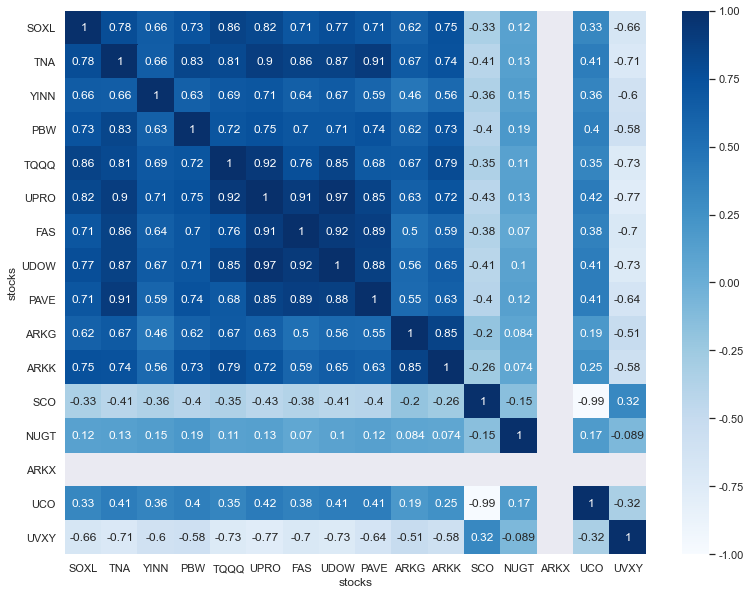

In [19]:
plot_heatmap_corrleation(merged_all,main_etf)

In [35]:
# corr_matrix = merged_all[['CMG','TQQQ','UUP','XLF','XLI']+['DRN','USD','UYM','SOXL','UDOW','EUO']].corr()
corr_matrix = merged_all[['UUP','EUO']].corr()
each_corr_mean = corr_matrix[corr_matrix!=1].mean()

In [36]:
each_corr_mean.sort_values()

UUP    0.939754
EUO    0.939754
dtype: float64

In [41]:
selected_new_tickers = [
#                         'UPS',#处于上升通道下沿，上穿5日均线，MACD值反转上升。到168左右止盈（0323）
#                         'PAYC', #走出一个三角楔形形态，形成支撑点:376.89	，上穿5日均线，到396.278左右止盈，MACD翻绿即止损（0323）
#                        'CSCO',#限价单49.74买入入场，形成支撑点49.74，并上穿5日均线，趋势向上；止损点48.15，止盈52.3(0323)
#                        'QS'#形成支撑点:59.99，并在5、10、20日均线之上，止损62.6(0323)
#                         "GOOGL",
                        "UDOW",
                        "EUO"
                       ]

In [51]:
final_target_portfolio_tickers = current_portfolio_tickers+selected_new_tickers

In [24]:
main_etf

['SOXL',
 'TNA',
 'YINN',
 'PBW',
 'TQQQ',
 'UPRO',
 'FAS',
 'UDOW',
 'PAVE',
 'ARKG',
 'ARKK',
 'SCO',
 'NUGT',
 'UCO',
 'UVXY']

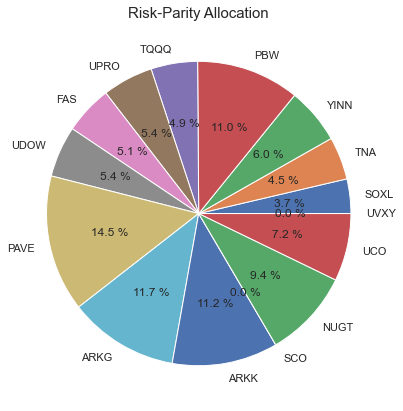

In [25]:
stocks_path = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/"
date_col = 'Date'
code_col = 'Ticker'
price_col = 'Adj Close'
ticker_type = 'string'
asset_name = "code"

risk_parity = RiskParity(stocks_path,
                          main_etf,
                          date_col,
                          code_col,
                          price_col,
                          ticker_type,
                          asset_name,
                          True)

In [26]:
df_weights = risk_parity.df_wts.sort_values("weight", ascending=False)

In [27]:
df_weights

,code,weight
8,PAVE,0.145104
9,ARKG,0.116702
10,ARKK,0.112404
3,PBW,0.109561
12,NUGT,0.093667
13,UCO,0.071866
2,YINN,0.059509
7,UDOW,0.054272
5,UPRO,0.053914
6,FAS,0.051442


In [110]:
largest_pos_wts = 0.1
smallest_pos = 0.05234
benchmark_ratio = largest_pos_wts/df_weights['weight'].values[0]
benchmark_ratio_ = 
df_weights['target_wts'] = df_weights['weight']*benchmark_ratio

In [111]:
def read_data_from_folders(ticker_list, csv_folder):
    # csv_folder = "C:/Users/Administrator/CE_github_2/data_pipeline/Data/"
    load_count = 1
    last_price_list = []
    last_date_list = []
    len_tickers = len(ticker_list)
    df = pd.DataFrame()
    for ticker in ticker_list:
        print(ticker)
        try:
            data = pd.read_csv(csv_folder+ticker+".csv")
            last_close_price = data['Adj Close'].values[-1]
            last_date = data['Date'].values[-1]
            last_price_list.append(last_close_price)
            last_date_list.append(last_date)
            print ("Data Loaded from DB: No.{} / {}: {}, date:{}".format(load_count, len_tickers, ticker, last_date))
        except Exception as e:
            print(ticker, "Error:", e)
        load_count +=1
    df['adj close'] = last_price_list
    df['code'] = ticker_list
    df['date'] = last_date_list
    return df

In [112]:
df_portfolio_close = read_data_from_folders(final_target_portfolio_tickers, us_db_path)

ARKG
Data Loaded from DB: No.1 / 8: ARKG, date:2021-03-23
BABA
Data Loaded from DB: No.2 / 8: BABA, date:2021-03-23
TSLA
Data Loaded from DB: No.3 / 8: TSLA, date:2021-03-23
PAYC
Data Loaded from DB: No.4 / 8: PAYC, date:2021-03-23
UPS
Data Loaded from DB: No.5 / 8: UPS, date:2021-03-23
GOOGL
Data Loaded from DB: No.6 / 8: GOOGL, date:2021-03-23
CMG
Data Loaded from DB: No.7 / 8: CMG, date:2021-03-23
UUP
Data Loaded from DB: No.8 / 8: UUP, date:2021-03-23


In [113]:
df_portfolio_close

,adj close,code,date
0,89.320000,ARKG,2021-03-23
1,237.669998,BABA,2021-03-23
2,662.159973,TSLA,2021-03-23
3,373.890015,PAYC,2021-03-23
4,159.860001,UPS,2021-03-23
5,2041.329956,GOOGL,2021-03-23
6,1451.290039,CMG,2021-03-23
7,24.879999,UUP,2021-03-23


In [114]:
df_weights

,code,weight,target_wts
7,UUP,0.521881,0.100000
4,UPS,0.101474,0.019444
5,GOOGL,0.077684,0.014885
6,CMG,0.072494,0.013891
1,BABA,0.069954,0.013404
0,ARKG,0.062384,0.011954
3,PAYC,0.048487,0.009291
2,TSLA,0.045642,0.008746


In [115]:
df_weights_close_price = df_weights.merge(df_portfolio_close, on = "code")

In [116]:
df_weights_close_price['portfolio_asset'] = 100000

In [117]:
df_weights_close_price

,code,weight,target_wts,adj close,date,portfolio_asset
0,UUP,0.521881,0.100000,24.879999,2021-03-23,100000
1,UPS,0.101474,0.019444,159.860001,2021-03-23,100000
2,GOOGL,0.077684,0.014885,2041.329956,2021-03-23,100000
3,CMG,0.072494,0.013891,1451.290039,2021-03-23,100000
4,BABA,0.069954,0.013404,237.669998,2021-03-23,100000
5,ARKG,0.062384,0.011954,89.320000,2021-03-23,100000
6,PAYC,0.048487,0.009291,373.890015,2021-03-23,100000
7,TSLA,0.045642,0.008746,662.159973,2021-03-23,100000


In [51]:
df_weights_close_price["shares"] = round(df_weights_close_price["portfolio_asset"]*df_weights_close_price["target_wts"]/df_weights_close_price['adj close'],0)                 
df_weights_close_price['target_dollar_position'] = df_weights_close_price['adj close']*df_weights_close_price['shares']

In [52]:
df_weights_close_price[df_weights_close_price["code"].isin(selected_new_tickers)]

,code,weight,target_wts,adj close,date,portfolio_asset,shares,target_dollar_position
2,GOOGL,0.132765,0.109849,2041.329956,2021-03-23,100000,5.0,10206.649780
3,CMG,0.125944,0.104205,1451.290039,2021-03-23,100000,7.0,10159.030273


In [53]:
df_weights_close_price[df_weights_close_price["code"].isin(selected_new_tickers)][['date','code','target_wts']]

,date,code,target_wts
2,2021-03-23,GOOGL,0.109849
3,2021-03-23,CMG,0.104205


In [ ]:
selected_new_tickers = ['UPS',#处于上升通道下沿，上穿5日均线，MACD值反转上升。止损点设为到168左右止盈（0323）
                        'PAYC', #走出一个三角楔形形态，形成支撑点:376.89	，上穿5日均线，到396.278左右止盈，MACD翻绿即止损（0323）
                       'CSCO',#限价单49.74买入入场，向上突破近期高点，并形成49.74附近的支撑点，并上穿5日均线，趋势向上；止损点48.15，止盈52.3
                       'QS'#形成支撑点:59.99，并在5、10、20日均线之上，止损62.6
                       ]

In [ ]:
# current portfolio & calculate correlations inside the portfolio

current_portfolio_tickers = ["ARKG",# 跌穿120日均线则止损
                             "BABA",#若当日收盘MACD死叉，则第二日平仓
                             "BNTX",# 跌下5日均线则平仓，或者涨上111则止盈
                             "LOW",#涨上183.5止盈；或者跌下5日均线;
                             "TSLA",# 跌穿120日均线则止损
                             "VZ"# 若当日收盘于5日均线以下，第二天平仓
                            ]

您订阅的【华彩智盈】操作计划更新了：
代码：CMG
时间：2021/3/24
价格：
方向：买入
仓位：10.4%
理由：上穿5日均线，并且短期趋势向上
平仓计划：若当日收盘在5日均线之下，第二日平仓

您订阅的【华彩智盈】操作计划更新了：
代码：UPS
时间：2021/3/23
价格：
方向：买入
仓位：9.6%
理由：处于上升通道下沿，上穿5日均线，MACD值反转上升
平仓计划：止损点设为156

您订阅的【华彩智盈】操作计划更新了：
代码：PAYC
时间：2021/3/23
价格：
方向：买入
仓位：5.4%
理由：近期走出一个三角楔形形态，收盘价在支撑点376.89附近之上，并且上穿5日均线
平仓计划：MACD翻绿即止损平仓

您订阅的【华彩智盈】操作计划更新了：
代码：QS
时间：2021/3/23
价格：
方向：买入
仓位：2%
理由：最新收盘价在近期支撑点59.99附近之上，并收于5、10、20日均线之上，短期有向上趋势
平仓计划：止损点设为62.6

以上仅为嘉宾操作计划展示，不构成任何投资建议，交易有风险，据此操作风险自负！

In [ ]:
开盘后

UPS 止损点设为156
CSCO限价单49.74买入，11.2%